In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
text_kwargs = dict(fontsize=30, color='black')
path = '/content/drive/MyDrive/Colab Notebooks/Hamoye Intership/Stage 1/immo_data.csv'
df = pd.read_csv(path)
df.head()

### Cleaning

In [2]:
# checking for duplicates
df.duplicated().any()

# dropping redundant columns
df.drop(df.columns[1:5], inplace=True, axis=1)
df.drop(df.columns[4:7], inplace=True, axis=1)
del df['noParkSpaces']
del df['firingTypes']
del df['houseNumber']
del df['streetPlain']
del df['typeOfFlat']
del df['yearConstructedRange']
df.drop(df.columns[12:15], inplace=True, axis=1)
df.drop(df.columns[17:20], inplace=True, axis=1)
df.drop(df.columns[22:29], inplace=True, axis=1)

# getting the number missing fields in each column
print(df.isnull().sum())

regio1                  0
newlyConst              0
balcony                 0
picturecount            0
yearConstructed     57045
scoutId                 0
hasKitchen              0
geo_bln                 0
cellar                  0
baseRent                0
livingSpace             0
geo_krs                 0
street                  0
lift                    0
baseRentRange           0
geo_plz                 0
noRooms                 0
noRoomsRange            0
garden                  0
livingSpaceRange        0
regio2                  0
regio3                  0
date                    0
dtype: int64


### Grouping the Regions

In [3]:
# clearing the duplicate cities to extra the cities from region1
region = df['regio1'].drop_duplicates().reset_index(drop=True)
print(region)

# grouping the regio1 cities
nordrhein_region = df.loc[df['regio1'] == region[0]]
rheinland_region = df.loc[df['regio1'] == region[1]]
sachsen_region = df.loc[df['regio1'] == region[2]]

bremen_region = df.loc[df['regio1'] == region[3]]
schleswig_region = df.loc[df['regio1'] == region[4]]
baden_region = df.loc[df['regio1'] == region[5]]

thüringen_region = df.loc[df['regio1'] == region[6]]
hessen_region = df.loc[df['regio1'] == region[7]]
niedersachsen_region = df.loc[df['regio1'] == region[8]]

bayern_region = df.loc[df['regio1'] == region[9]]
hamburg_region = df.loc[df['regio1'] == region[10]]
sachsen_an_region = df.loc[df['regio1'] == region[11]]

mecklenburg_region = df.loc[df['regio1'] == region[12]]
berlin_region = df.loc[df['regio1'] == region[13]]
brandenburg_region = df.loc[df['regio1'] == region[14]]
saarland_region = df.loc[df['regio1'] == region[15]]

0        Nordrhein_Westfalen
1            Rheinland_Pfalz
2                    Sachsen
3                     Bremen
4         Schleswig_Holstein
5          Baden_Württemberg
6                  Thüringen
7                     Hessen
8              Niedersachsen
9                     Bayern
10                   Hamburg
11            Sachsen_Anhalt
12    Mecklenburg_Vorpommern
13                    Berlin
14               Brandenburg
15                  Saarland
Name: regio1, dtype: object



### Visualizing the most-expensive areas

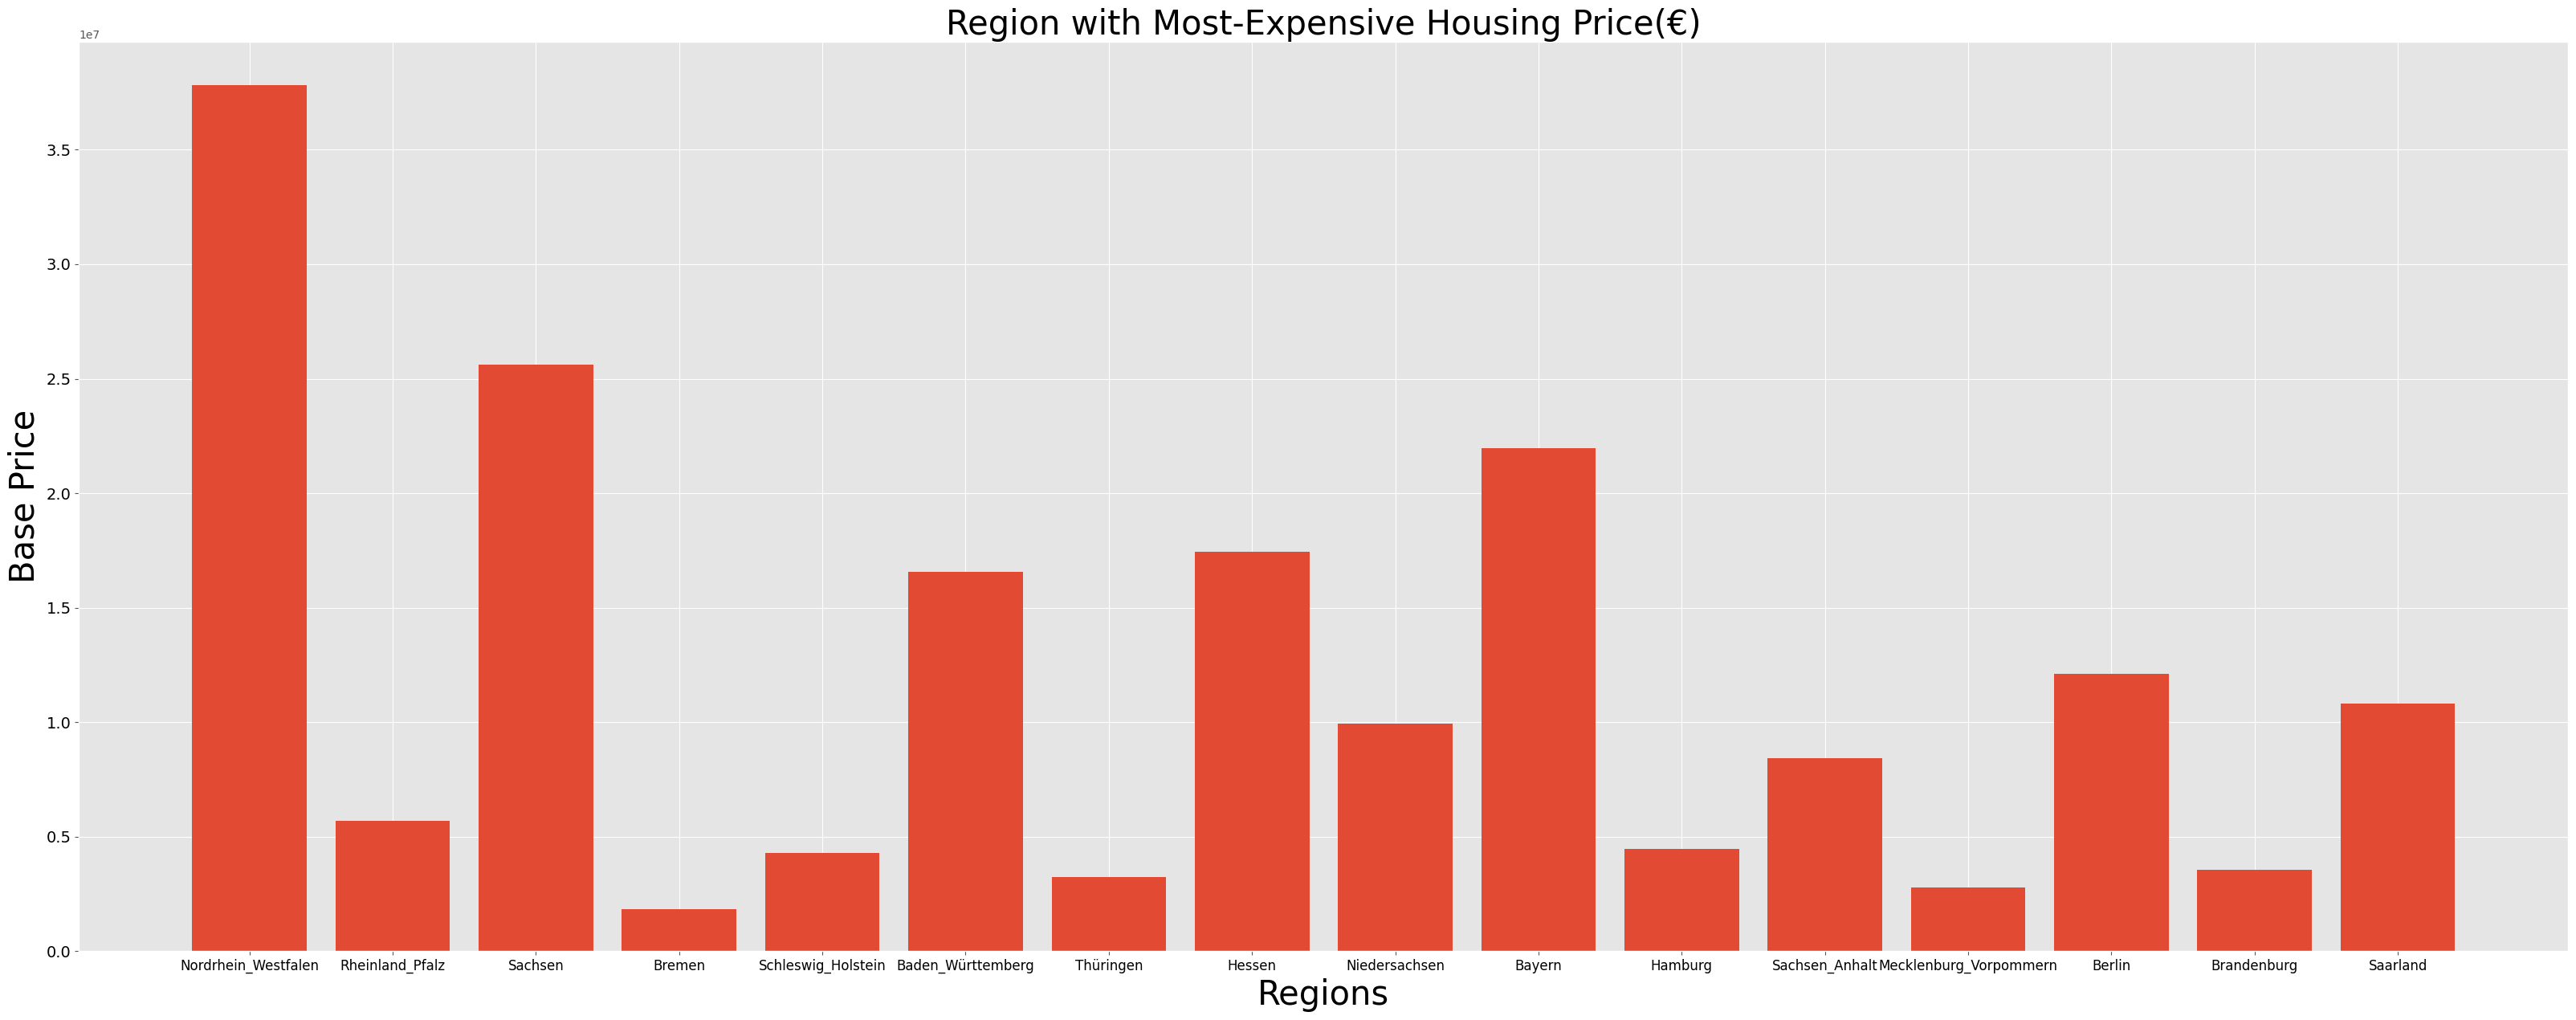

In [5]:
plt.figure(figsize=[40,15], dpi=100)
plt.style.use('ggplot')

prices = np.array([nordrhein_region['baseRent'].sum(), rheinland_region['baseRent'].sum(), sachsen_region['baseRent'].sum(),
                   bremen_region['baseRent'].sum(),schleswig_region['baseRent'].sum(),baden_region['baseRent'].sum(),thüringen_region['baseRent'].sum(),
                   hessen_region['baseRent'].sum(),niedersachsen_region['baseRent'].sum(),bayern_region['baseRent'].sum(),
                   hamburg_region['baseRent'].sum(),sachsen_an_region['baseRent'].sum(),mecklenburg_region['baseRent'].sum(),
                   berlin_region['baseRent'].sum(),brandenburg_region['baseRent'].sum(),saarland_region['baseRent'].sum()])

plt.bar(region, prices)
plt.title('Region with Most-Expensive Housing Price(€)', **text_kwargs)

plt.ylabel('Base Price', **text_kwargs)
plt.xlabel('Regions', **text_kwargs)
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=14,  color='black')

plt.savefig('/content/drive/MyDrive/Colab Notebooks/matplotlib/most expensive region.png')

plt.show()